In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 18:16:40 2021

@author: pmarc
Résolution Problème L12 - #2 par Pierre-Marc Juneau, 22 avril 2021

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
# statsmodels.formula.api import ols


In [3]:


donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r3.csv')

"Pré-traitement"

donnee=donnee.dropna()

Q1 = donnee["Revenus"].quantile(0.25)
Q3 = donnee["Revenus"].quantile(0.75)
IQR = Q3 - Q1
donnee = donnee[(donnee["Revenus"] > (Q1 - 1.5 * IQR)) & (donnee["Revenus"] < (Q3 + 1.5 * IQR))]


stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)
donnee=donnee.dropna()
donnee = donnee.drop('Date', 1)
MatriceCorr=donnee.corr()


X=donnee
X=X.drop({'ID','Vins ($/2sem)'},1)
X=pd.get_dummies(X)
X = X.drop('Statut Mat_Autre', 1)
Y=donnee[["Vins ($/2sem)"]]
X=pd.get_dummies(X)
Xmat=X.assign(const=1).values
Ymat=Y.values.reshape(-1,1)
n=Xmat.shape[0]
p=Xmat.shape[1]


/tmp/ipykernel_174120/4248372161.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  donnee = donnee.drop('Date', 1)
/tmp/ipykernel_174120/4248372161.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  MatriceCorr=donnee.corr()
/tmp/ipykernel_174120/4248372161.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'ID','Vins ($/2sem)'},1)
/tmp/ipykernel_174120/4248372161.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('Statut Mat_Autre', 1)


In [4]:

"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"Régression multilinéaire"

"Ronde 1"
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     235.8
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:32:55   Log-Likelihood:                -14718.
No. Observations:                2208   AIC:                         2.948e+04
Df Residuals:                    2187   BIC:                         2.960e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Âge                                       0.1382      0.384      0.360      0.719      -0.614       0.890
Revenus                                   0.0083      0.000     19.985      0.000       0.008       0.009
Enfants                                 -63.1512     10.360     -6.095      0.000     -83.469     -42.834
Adolescents                             -39.5568      9.730     -4.066      0.000     -58.637     -20.477
Temps depuis dernier achat                0.1192      0.141      0.846      0.398      -0.157       0.395
Fruits ($/2sem)                          -0.4951      0.142     -3.482      0.001      -0.774      -0.216
Viandes ($/2sem)                          0.1652      0.033      5.082      0.000       0.101       0.229
Poisson ($/2sem)                         -0.4757      0.108     -4.420      0.000      -0.687      -0.265
Sucreries ($/2sem)                       -0.6590      0.137     -4.810      0.000      -0.928      -0.390
Joaillerie ($/2sem)                       0.0462      0.095      0.484      0.629      -0.141       0.233
Achats avec rabais                       -0.3835      2.828     -0.136      0.892      -5.930       5.163
Achats web                               12.0986      2.107      5.741      0.000       7.966      16.231
Achats catalogues                        33.1883      2.455     13.519      0.000      28.374      38.003
Achats en magasin                        20.0505      1.908     10.506      0.000      16.308      23.793
Nombre de visite sites web (par mois)    36.3909      2.619     13.895      0.000      31.255      41.527
Statut Mat_Conjoint de fait              99.1993     96.430      1.029      0.304     -89.904     288.303
Statut Mat_Célibataire                   85.7840     96.486      0.889      0.374    -103.430     274.998
Statut Mat_Divorcé                       97.7692     96.919      1.009      0.313     -92.294     287.832
Statut Mat_Marié                         89.8195     96.316      0.933      0.351     -99.060     278.699
Statut Mat_Veuf                          91.3065     98.625      0.926      0.355    -102.102     284.715
const                                  -608.7508    100.581     -6.052      0.000    -805.995    -411.507
==============================================================================
Omnibus:                      347.084   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.516
Skew:                           0.732   Prob(JB):                    1.63e-290
Kurtosis:                       6.516   Cond. No.                     3.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of 

In [5]:

"Ronde 2"
X=donnee
X=X.drop({'ID','Vins ($/2sem)','Âge','Temps depuis dernier achat','Statut Mat'},1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_174120/3478088799.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'ID','Vins ($/2sem)','Âge','Temps depuis dernier achat','Statut Mat'},1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     363.0
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:33:00   Log-Likelihood:                -14720.
No. Observations:                2208   AIC:                         2.947e+04
Df Residuals:                    2194   BIC:                         2.955e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Revenus                                   0.0083      0.000     20.079      0.000       0.008       0.009
Enfants                                 -63.0259     10.225     -6.164      0.000     -83.077     -42.975
Adolescents                             -37.3644      9.326     -4.007      0.000     -55.653     -19.076
Fruits ($/2sem)                          -0.4997      0.142     -3.521      0.000      -0.778      -0.221
Viandes ($/2sem)                          0.1655      0.032      5.110      0.000       0.102       0.229
Poisson ($/2sem)                         -0.4790      0.107     -4.467      0.000      -0.689      -0.269
Sucreries ($/2sem)                       -0.6525      0.136     -4.785      0.000      -0.920      -0.385
Joaillerie ($/2sem)                       0.0415      0.095      0.437      0.662      -0.145       0.228
Achats avec rabais                       -0.5305      2.823     -0.188      0.851      -6.067       5.006
Achats web                               12.1782      2.105      5.786      0.000       8.050      16.306
Achats catalogues                        33.3489      2.449     13.618      0.000      28.546      38.151
Achats en magasin                        20.0295      1.901     10.535      0.000      16.301      23.758
Nombre de visite sites web (par mois)    36.3166      2.613     13.900      0.000      31.193      41.440
const                                  -504.3823     25.491    -19.787      0.000    -554.371    -454.394
==============================================================================
Omnibus:                      347.084   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1344.239
Skew:                           0.730   Prob(JB):                    1.27e-292
Kurtosis:                       6.532   Cond. No.                     3.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:

"Ronde 3"
X=X.drop({'Achats avec rabais','Joaillerie ($/2sem)'},1)
modele=sm.OLS(Y,X.assign(const=1))
resultats=modele.fit()
Y_chap = resultats.predict(X.assign(const=1))
resultats.summary()


/tmp/ipykernel_174120/3021714257.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=X.drop({'Achats avec rabais','Joaillerie ($/2sem)'},1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Vins ($/2sem)   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     429.4
Date:                Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:33:04   Log-Likelihood:                -14720.
No. Observations:                2208   AIC:                         2.946e+04
Df Residuals:                    2196   BIC:                         2.953e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Revenus                                   0.0083      0.000     20.522      0.000       0.008       0.009
Enfants                                 -63.9246      9.645     -6.627      0.000     -82.840     -45.009
Adolescents                             -38.0057      8.560     -4.440      0.000     -54.791     -21.220
Fruits ($/2sem)                          -0.4927      0.141     -3.494      0.000      -0.769      -0.216
Viandes ($/2sem)                          0.1647      0.032      5.100      0.000       0.101       0.228
Poisson ($/2sem)                         -0.4723      0.106     -4.451      0.000      -0.680      -0.264
Sucreries ($/2sem)                       -0.6521      0.136     -4.783      0.000      -0.919      -0.385
Achats web                               12.2528      2.024      6.052      0.000       8.283      16.223
Achats catalogues                        33.4532      2.386     14.022      0.000      28.775      38.132
Achats en magasin                        19.9619      1.844     10.823      0.000      16.345      23.579
Nombre de visite sites web (par mois)    36.2242      2.556     14.171      0.000      31.211      41.237
const                                  -503.6897     25.423    -19.812      0.000    -553.546    -453.834
==============================================================================
Omnibus:                      348.437   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1346.936
Skew:                           0.734   Prob(JB):                    3.28e-293
Kurtosis:                       6.534   Cond. No.                     3.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

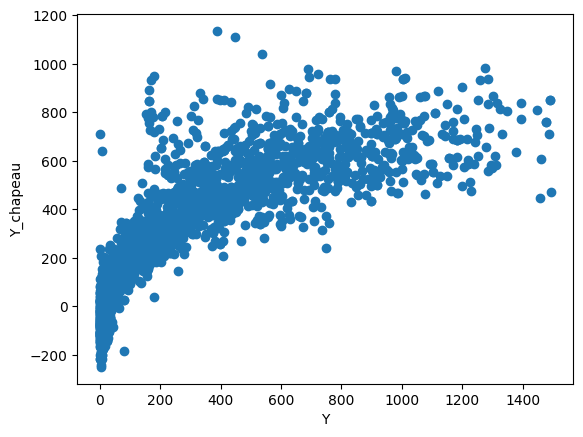

In [7]:


plt.scatter(Ymat, Y_chap)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()


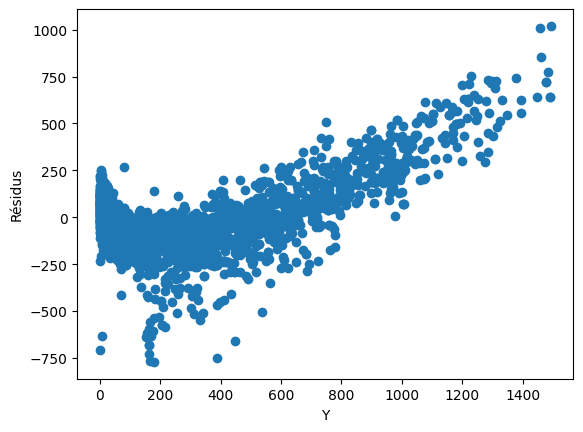

In [9]:

Epsilon=Ymat-Y_chap.values.reshape(-1,1)
plt.figure(1)
plt.plot(Ymat, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()


Text(0.5, 0, 'Erreurs')

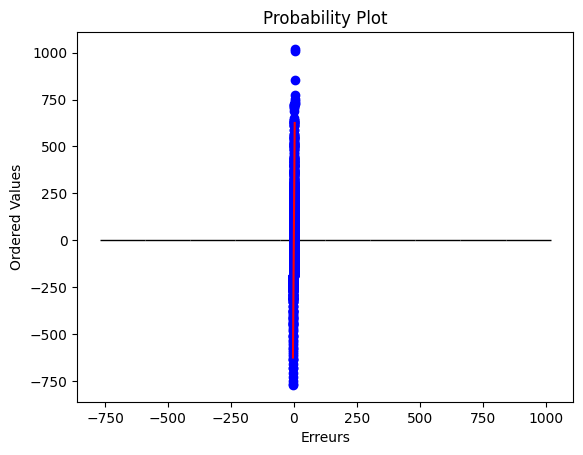

In [10]:
sts.probplot(Epsilon[:,0],dist=sts.norm, plot=plt.figure().add_subplot(111))
ax=plt.hist(Epsilon,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Erreurs")


Text(0.5, 0, 'Y')

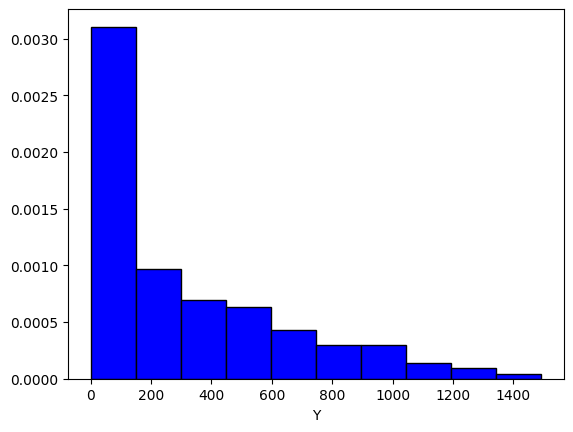

In [13]:

ax=plt.hist(Ymat,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Y")


Text(0.5, 0, 'Y')

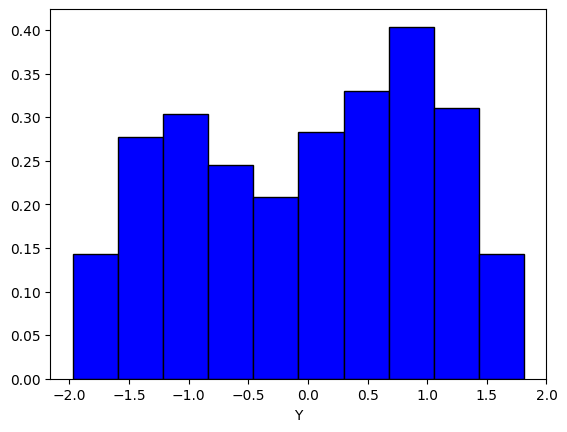

In [15]:

"%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%"
"En utilisant une transformation"

from sklearn.preprocessing import PowerTransformer
ptX = PowerTransformer()
ptX.fit(X)
Xtransf=pd.DataFrame(ptX.transform(X))
Xtransf.columns=X.columns
ptY = PowerTransformer()
ptY.fit(Y)
Ytransf=pd.DataFrame(ptY.transform(Y))
Ytransf.columns=Ytransf.columns
modele=sm.OLS(Ytransf,Xtransf)
resultats=modele.fit()
Y_chap_transf = resultats.predict(Xtransf)
resultats.summary()

ax=plt.hist(Ytransf,density=True, bins = 10, color = 'blue', edgecolor = 'black')
plt.xlabel("Y")


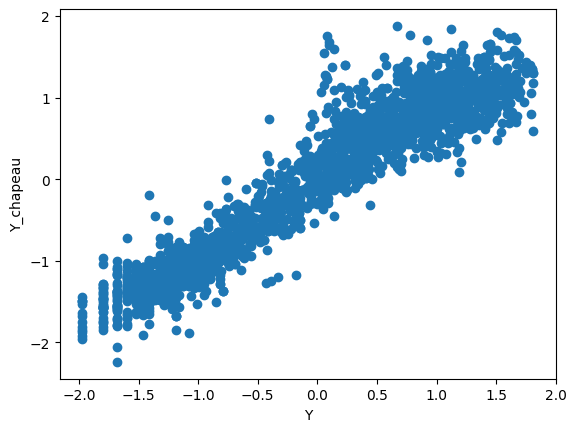

In [16]:



plt.scatter(Ytransf, Y_chap_transf)
plt.xlabel("Y")
plt.ylabel("Y_chapeau")
plt.show()


/home/hadoop/.local/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


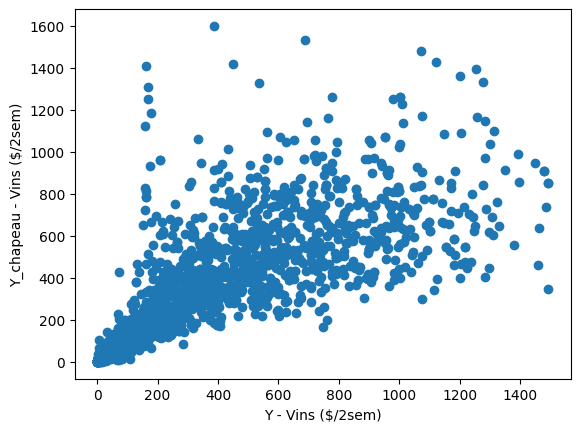

In [17]:

Y_chapeau = ptY.inverse_transform(Y_chap_transf.values.reshape(-1,1))
plt.scatter(Y, Y_chapeau)
plt.xlabel("Y - Vins ($/2sem)")
plt.ylabel("Y_chapeau - Vins ($/2sem)")
plt.show()
R2=np.corrcoef(Y.T,Y_chap.T)[0,1]


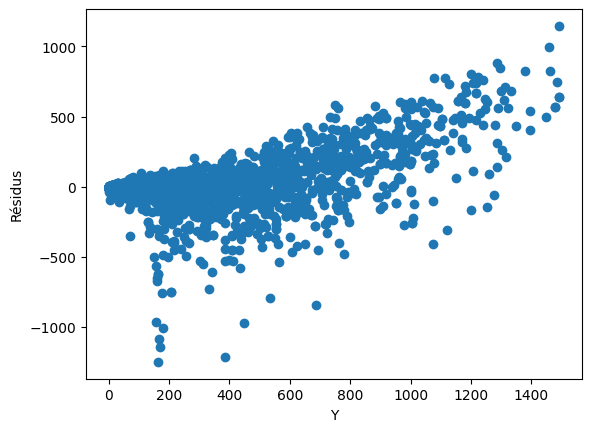

In [18]:

Epsilon=Y.values.reshape(-1,1)-Y_chapeau.reshape(-1,1)
plt.figure(1)
plt.plot(Y.values, Epsilon, 'o')
plt.xlabel("Y")
plt.ylabel("Résidus")
plt.show()